This notebook will be mainly used for the Capstone Project for the final module of the IBM Data Science Professional Certificate.

In [1]:
import pandas as pd
import numpy as np
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
#The code below imports the data set for SA Crashes 2019
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_59b31594f5cc4c1ea7cc2d997f2a6077 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jWYMftPiAiF-SYoymEY4A6SyuJp6bJb5E21g91yAZ5KX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_59b31594f5cc4c1ea7cc2d997f2a6077.get_object(Bucket='courseracapstone-donotdelete-pr-mcqilmhdsobnfo',Key='2019_DATA_SA_Crash.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,...,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
0,2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,NaN,NaN,1331810.03,1676603.26,13318101676603
1,2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,...,Rear End,2,Driver Rider,1: PDO,No Control,NaN,NaN,1328376.20,1682942.63,13283761682943
2,2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,...,Hit Pedestrian,1,Driver Rider,2: MI,No Control,NaN,NaN,1325819.68,1670994.26,13258201670994
3,2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,...,Hit Fixed Object,1,Driver Rider,3: SI,No Control,NaN,NaN,1328320.60,1690237.08,13283211690237
4,2019-5-8/07/2020,2 Metropolitan,MOUNT BARKER,5251,DC MT.BARKER.,2,0,0,0,0,...,Hit Animal,2,Animal,1: PDO,No Control,NaN,NaN,1353279.99,1655645.15,13532801655645


Loading all libraries required for this project

In [3]:
#Load all libraries we will require for the data analysis, cleaning and model building 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
#Import the required functions to create a Decision Tree Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [5]:
#Import Model Evaluation Metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [6]:
#Instal Seaborn Package
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [7]:
#Import Seaborn Library for Data Visualization and Pre-Processing
import seaborn as sns

Data Visualization and Processing

In [8]:
df.head()

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,...,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
0,2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,NaN,NaN,1331810.03,1676603.26,13318101676603
1,2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,...,Rear End,2,Driver Rider,1: PDO,No Control,NaN,NaN,1328376.20,1682942.63,13283761682943
2,2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,...,Hit Pedestrian,1,Driver Rider,2: MI,No Control,NaN,NaN,1325819.68,1670994.26,13258201670994
3,2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,...,Hit Fixed Object,1,Driver Rider,3: SI,No Control,NaN,NaN,1328320.60,1690237.08,13283211690237
4,2019-5-8/07/2020,2 Metropolitan,MOUNT BARKER,5251,DC MT.BARKER.,2,0,0,0,0,...,Hit Animal,2,Animal,1: PDO,No Control,NaN,NaN,1353279.99,1655645.15,13532801655645


In [9]:
#Drop the columns that will not be used in this study
df.drop(['REPORT_ID','Postcode','LGA Name','Total Cas','Total Fats', 'Total SI', 'Total MI','Year','Month','Time','Horizontal Align','Vertical Align','Other Feat','Unit Resp','Entity Code','ACCLOC_X','ACCLOC_Y','UNIQUE_LOC'], axis=1, inplace=True)

In [10]:
#What's the severity of each accident in the data set:
df['CSEF Severity'].value_counts()

1: PDO      8188
2: MI       3937
3: SI        729
4: Fatal     110
Name: CSEF Severity, dtype: int64

In [11]:
#Before plotting the data, we will change the NaN fields for DUI involved and Drugs Involved to 0 
df['DUI Involved'] = df['DUI Involved'].fillna(0)
df['Drugs Involved'] = df['Drugs Involved'].fillna(0)

In [12]:
#and then apply the function to modify Y to 1
df['DUI Involved'].replace({'Y': 1}, inplace=True)
df['Drugs Involved'].replace({'Y': 1}, inplace=True)
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Sealed,Dry,Not Raining,Daylight,Right Angle,1: PDO,Give Way Sign,0,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Sealed,Dry,Not Raining,Night,Rear End,1: PDO,No Control,0,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Sealed,Dry,Not Raining,Night,Hit Pedestrian,2: MI,No Control,0,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Sealed,Dry,Not Raining,Night,Hit Fixed Object,3: SI,No Control,0,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Sealed,Dry,Not Raining,Night,Hit Animal,1: PDO,No Control,0,0


In [13]:
#Merge the DUI Involved and Drugs Involved into a new column called Under Influence
df['Under Influence']=df['DUI Involved']+df['Drugs Involved']
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Sealed,Dry,Not Raining,Daylight,Right Angle,1: PDO,Give Way Sign,0,0,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Sealed,Dry,Not Raining,Night,Rear End,1: PDO,No Control,0,0,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Sealed,Dry,Not Raining,Night,Hit Pedestrian,2: MI,No Control,0,0,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Sealed,Dry,Not Raining,Night,Hit Fixed Object,3: SI,No Control,0,0,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Sealed,Dry,Not Raining,Night,Hit Animal,1: PDO,No Control,0,0,0


In [14]:
#Drop additional non-required variables
df.drop(['DUI Involved','Drugs Involved'], axis=1, inplace=True)

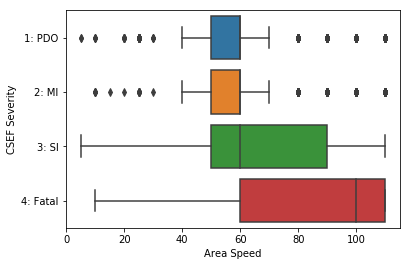

In [15]:
#First plot to visualize data will be a boxplot. We will check how the area speed affects the severity of accidents injuries
sns.boxplot(x='Area Speed', y='CSEF Severity', data=df)

In [24]:
#Now let's check if driving under the influence impacts the severity of the crashes: 
df.groupby(['Under Influence'])['CSEF Severity'].value_counts(normalize=True)

Under Influence  CSEF Severity
0                1: PDO           0.647831
                 2: MI            0.297365
                 3: SI            0.048237
                 4: Fatal         0.006567
1                2: MI            0.428571
                 1: PDO           0.322689
                 3: SI            0.210084
                 4: Fatal         0.038655
2                2: MI            0.411765
                 3: SI            0.264706
                 4: Fatal         0.176471
                 1: PDO           0.147059
Name: CSEF Severity, dtype: float64

As per the above results, people driving under the influence of alcohol or alcohol and other drugs are more likely to be involved in more serious accidents. With the fatality rate when two different types of substances are involved being 17%. 

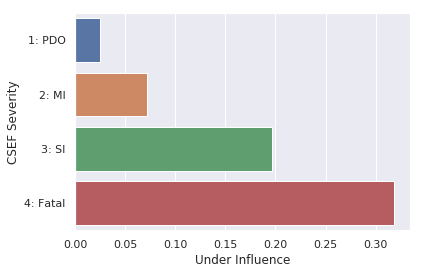

In [35]:
#Now, let's reproduce the information above in a bar plot
sns.barplot(x='Under Influence', y='CSEF Severity', data=df, ci= None)
plt.show()

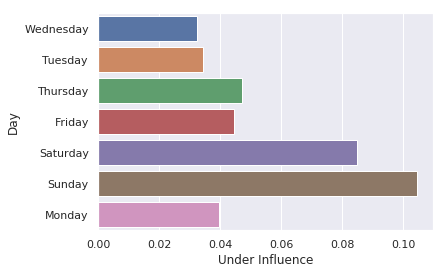

In [36]:
#Let's now check with a bar chart which days of the week people are more likely to be driving under the influence of substances
sns.barplot(x='Under Influence', y='Day', data=df, ci= None)
plt.show()

From the above, we can conclude that on the weekends it's more likely that people will be driving under the influence of one or more substances. 

In [37]:
#Before proceeding to modelling, lets check the perncentages of a few other varibles: 
df.groupby(['Road Surface'])['CSEF Severity'].value_counts(normalize=True)

Road Surface  CSEF Severity
Sealed        1: PDO           0.633707
              2: MI            0.304344
              3: SI            0.053848
              4: Fatal         0.008101
Unknown       1: PDO           1.000000
Unsealed      1: PDO           0.559140
              2: MI            0.282258
              3: SI            0.137097
              4: Fatal         0.021505
Name: CSEF Severity, dtype: float64

In [45]:
#Lets drop rows classified as unknown
index_SFC = df[df['Road Surface'] == 'Unknown'].index
#Drop the index_SFC
df.drop(index_SFC, inplace=True)

In [46]:
#Lets now check the percentage again: 
df.groupby(['Road Surface'])['CSEF Severity'].value_counts(normalize=True)

Road Surface  CSEF Severity
Sealed        1: PDO           0.633707
              2: MI            0.304344
              3: SI            0.053848
              4: Fatal         0.008101
Unsealed      1: PDO           0.559140
              2: MI            0.282258
              3: SI            0.137097
              4: Fatal         0.021505
Name: CSEF Severity, dtype: float64

The above shows that the road pavement does not have a strong correlation with the accidents severity, so we will drop this variable from the data frame.

In [47]:
#Drop additional non-required variables
df.drop(['Road Surface'], axis=1, inplace=True)

In [48]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Moisture Cond,Weather Cond,DayNight,Crash Type,CSEF Severity,Traffic Ctrls,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Dry,Not Raining,Daylight,Right Angle,1: PDO,Give Way Sign,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Dry,Not Raining,Night,Rear End,1: PDO,No Control,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Dry,Not Raining,Night,Hit Pedestrian,2: MI,No Control,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Dry,Not Raining,Night,Hit Fixed Object,3: SI,No Control,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Dry,Not Raining,Night,Hit Animal,1: PDO,No Control,0


In [49]:
#Lets now check the Moisture Conditions: 
df.groupby(['Moisture Cond'])['CSEF Severity'].value_counts(normalize=True)

Moisture Cond  CSEF Severity
Dry            1: PDO           0.629154
               2: MI            0.304374
               3: SI            0.057603
               4: Fatal         0.008869
Unknown        1: PDO           0.636364
               2: MI            0.181818
               3: SI            0.090909
               4: Fatal         0.090909
Wet            1: PDO           0.652600
               2: MI            0.299925
               3: SI            0.043708
               4: Fatal         0.003768
Name: CSEF Severity, dtype: float64

In [50]:
#Eliminate Unknown variables on the rows
index_MCT = df[df['Moisture Cond'] == 'Unknown'].index
df.drop(index_MCT, inplace=True)

In [51]:
df.groupby(['Moisture Cond'])['CSEF Severity'].value_counts(normalize=True)

Moisture Cond  CSEF Severity
Dry            1: PDO           0.629154
               2: MI            0.304374
               3: SI            0.057603
               4: Fatal         0.008869
Wet            1: PDO           0.652600
               2: MI            0.299925
               3: SI            0.043708
               4: Fatal         0.003768
Name: CSEF Severity, dtype: float64

From the above percentages we can conclude the moisture conditions also do not have a strong correlation to the severity of accidents. 

In [52]:
df.drop(['Moisture Cond'], axis=1, inplace=True)

In [53]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,Crash Type,CSEF Severity,Traffic Ctrls,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Not Raining,Daylight,Right Angle,1: PDO,Give Way Sign,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Not Raining,Night,Rear End,1: PDO,No Control,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Not Raining,Night,Hit Pedestrian,2: MI,No Control,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Not Raining,Night,Hit Fixed Object,3: SI,No Control,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Not Raining,Night,Hit Animal,1: PDO,No Control,0


In [55]:
#Before eliminating more variables, let's process the Traffic Controls data: 
df['Traffic Ctrls'].value_counts()

No Control                   8786
Traffic Signals              2231
Give Way Sign                 908
Stop Sign                     506
Roundabout                    483
Rail Xing - Boom               10
Rail Xing - Flashing            6
Rail Xing-Traffic Signals       6
Other                           5
Name: Traffic Ctrls, dtype: int64

In [56]:
#Lets replace all variables that appear as a 'No Control' by a 0:
df['Traffic Ctrls'].replace({'No Control': 0}, inplace=True)

In [64]:
#Lets execute the same replace command to change all other variables that show some type of control available to a 1:
df['Traffic Ctrls'].replace({'Traffic Signals':1}, inplace=True)
df['Traffic Ctrls'].replace({'Give Way Sign':1}, inplace=True)
df['Traffic Ctrls'].replace({'Stop Sign':1}, inplace=True)
df['Traffic Ctrls'].replace({'Roundabout':1}, inplace=True)
df['Traffic Ctrls'].replace({'Rail Xing - Boom':1}, inplace=True)
df['Traffic Ctrls'].replace({'Rail Xing - Flashing':1}, inplace=True)
df['Traffic Ctrls'].replace({'Rail Xing-Traffic Signals':1}, inplace=True)
df['Traffic Ctrls'].replace({'Other':1}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [66]:
df['Traffic Ctrls'].value_counts()

0    8786
1    4155
Name: Traffic Ctrls, dtype: int64

In [67]:
df.groupby(['Traffic Ctrls'])['CSEF Severity'].value_counts(normalize=True)

Traffic Ctrls  CSEF Severity
0              1: PDO           0.638630
               2: MI            0.289552
               3: SI            0.061234
               4: Fatal         0.010585
1              1: PDO           0.616606
               2: MI            0.334296
               3: SI            0.045487
               4: Fatal         0.003610
Name: CSEF Severity, dtype: float64

    The presence of traffic controls also do not appear to be totally related to the severity of the crashes, so we will also drop it. 

In [70]:
df.drop(['Traffic Ctrls'], axis=1, inplace=True)

In [71]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,Crash Type,CSEF Severity,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Not Raining,Daylight,Right Angle,1: PDO,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Not Raining,Night,Rear End,1: PDO,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Not Raining,Night,Hit Pedestrian,2: MI,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Not Raining,Night,Hit Fixed Object,3: SI,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Not Raining,Night,Hit Animal,1: PDO,0


In [72]:
#Lets check the count for the Light (Day/Night) conditions on the day of collision:

df['DayNight'].value_counts()

Daylight    9917
Night       3024
Name: DayNight, dtype: int64

In [74]:
#Lets check the percentages of accidents and the influence of day light on the severity of them: 
df.groupby(['DayNight'])['CSEF Severity'].value_counts(normalize=True)

DayNight  CSEF Severity
Daylight  1: PDO           0.625693
          2: MI            0.314611
          3: SI            0.051830
          4: Fatal         0.007865
Night     1: PDO           0.650794
          2: MI            0.268849
          3: SI            0.070437
          4: Fatal         0.009921
Name: CSEF Severity, dtype: float64

Does not seem to be clearly related, but we will keep it for now. 

In [85]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,Crash Type,CSEF Severity,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Not Raining,Daylight,Right Angle,1: PDO,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Not Raining,Night,Rear End,1: PDO,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Not Raining,Night,Hit Pedestrian,2: MI,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Not Raining,Night,Hit Fixed Object,3: SI,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Not Raining,Night,Hit Animal,1: PDO,0


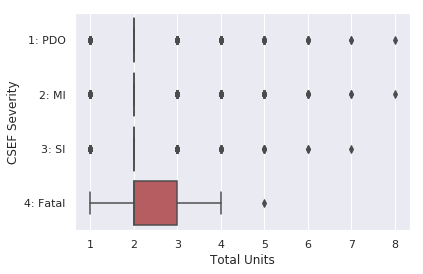

In [86]:
#Lets Boxplot to see how the number of units involved relates to the CSEF Severity:
sns.boxplot(x='Total Units', y='CSEF Severity', data=df)

The above distribution shows that the great majority of the accidents involving a fatality or other injuries involve either 2 or 3 vehicles, so we will drop all rows containing different values

In [88]:
index_UNT = df[df['Total Units'] == 1].index
#Drop the index_UNT
df.drop(index_UNT, inplace=True)

In [92]:
index_UNT2 = df[df['Total Units'] > 4].index
df.drop(index_UNT2, inplace=True)

In [93]:
df['Total Units'].value_counts()

2    10381
3     1580
4      298
Name: Total Units, dtype: int64

In [94]:
index_UNT3 = df[df['Total Units'] == 4].index
df.drop(index_UNT3, inplace=True)

In [95]:
df['Total Units'].value_counts()

2    10381
3     1580
Name: Total Units, dtype: int64

In [97]:
df.groupby(['Total Units'])['CSEF Severity'].value_counts(normalize=True)

Total Units  CSEF Severity
2            1: PDO           0.653405
             2: MI            0.291590
             3: SI            0.048550
             4: Fatal         0.006454
3            1: PDO           0.601266
             2: MI            0.336076
             3: SI            0.045570
             4: Fatal         0.017089
Name: CSEF Severity, dtype: float64

In [98]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,Crash Type,CSEF Severity,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Not Raining,Daylight,Right Angle,1: PDO,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Not Raining,Night,Rear End,1: PDO,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Not Raining,Night,Hit Pedestrian,2: MI,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Not Raining,Night,Hit Fixed Object,3: SI,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Not Raining,Night,Hit Animal,1: PDO,0


In [101]:
#For the purpose of this study I will drop another vaiable - The Crash Type
df.drop(['Crash Type'], axis=1, inplace=True)
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,CSEF Severity,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,Not Raining,Daylight,1: PDO,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,Not Raining,Night,1: PDO,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,Not Raining,Night,2: MI,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,Not Raining,Night,3: SI,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,Not Raining,Night,1: PDO,0


In [102]:
#Lets now look into the weather condition count
df['Weather Cond'].value_counts()

Not Raining    11136
Raining          798
Unknown           27
Name: Weather Cond, dtype: int64

In [103]:
#As before, we will discard any unknown values first
index_WTH = df[df['Weather Cond'] == 'Unknown'].index
df.drop(index_WTH, inplace=True)

In [104]:
df['Weather Cond'].value_counts()

Not Raining    11136
Raining          798
Name: Weather Cond, dtype: int64

In [106]:
df.groupby(['Weather Cond'])['CSEF Severity'].value_counts(normalize=True)

Weather Cond  CSEF Severity
Not Raining   1: PDO           0.646013
              2: MI            0.296875
              3: SI            0.048851
              4: Fatal         0.008261
Raining       1: PDO           0.651629
              2: MI            0.307018
              3: SI            0.040100
              4: Fatal         0.001253
Name: CSEF Severity, dtype: float64

Does not seem the weather conditions have a strong correlation, but we will keep the variable. 

In [107]:
#I will now convert Day Night into numbers where 1=day and 2=night
df['DayNight'].replace({'Daylight':1}, inplace=True)
df['DayNight'].replace({'Night':2}, inplace=True)

In [109]:
df['DayNight'].value_counts()

1    9162
2    2772
Name: DayNight, dtype: int64

In [110]:
#I will repeat the same to convert Not Raining = 0 and Raining = 1
df['Weather Cond'].replace({'Not Raining':0}, inplace=True)
df['Weather Cond'].replace({'Raining':1}, inplace=True)

In [111]:
df['Weather Cond'].value_counts()

0    11136
1      798
Name: Weather Cond, dtype: int64

In [112]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,CSEF Severity,Under Influence
0,2 Metropolitan,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,0,1,1: PDO,0
1,2 Metropolitan,DRY CREEK,2,Tuesday,90,Divided Road,0,2,1: PDO,0
2,2 Metropolitan,MILE END,2,Tuesday,60,Divided Road,0,2,2: MI,0
3,2 Metropolitan,PARALOWIE,2,Tuesday,50,Not Divided,0,2,3: SI,0
4,2 Metropolitan,MOUNT BARKER,2,Tuesday,110,Divided Road,0,2,1: PDO,0


In [114]:
#Lets check the Stats Area Now:
df.groupby(['Stats Area'])['CSEF Severity'].value_counts(normalize=True)

Stats Area      CSEF Severity
1 City          1: PDO           0.660407
                2: MI            0.298905
                3: SI            0.039124
                4: Fatal         0.001565
2 Metropolitan  1: PDO           0.654141
                2: MI            0.301014
                3: SI            0.040647
                4: Fatal         0.004198
3 Country       1: PDO           0.590969
                2: MI            0.274869
                3: SI            0.100785
                4: Fatal         0.033377
Name: CSEF Severity, dtype: float64

In [115]:
#We will also replace the Stats Area with numbers, where 1=City, 2=Metropolitan and 3=Country
df['Stats Area'].replace({'1 City':1}, inplace=True)
df['Stats Area'].replace({'2 Metropolitan':2}, inplace=True)
df['Stats Area'].replace({'3 Country':3}, inplace=True)

In [116]:
df['Stats Area'].value_counts()

2    9767
3    1528
1     639
Name: Stats Area, dtype: int64

In [117]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,CSEF Severity,Under Influence
0,2,HAMPSTEAD GARDENS,2,Wednesday,60,Cross Road,0,1,1: PDO,0
1,2,DRY CREEK,2,Tuesday,90,Divided Road,0,2,1: PDO,0
2,2,MILE END,2,Tuesday,60,Divided Road,0,2,2: MI,0
3,2,PARALOWIE,2,Tuesday,50,Not Divided,0,2,3: SI,0
4,2,MOUNT BARKER,2,Tuesday,110,Divided Road,0,2,1: PDO,0


In [118]:
#I will also replace Day of the Week to reflect the following Monday=1, Tuesday=2, Wednesday=3, Thursday=4, Friday=5, Saturday=6, Sunday=7
df['Day'].replace({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}, inplace=True)

In [119]:
df['Day'].value_counts()

5    1974
3    1957
4    1930
2    1908
1    1693
6    1377
7    1095
Name: Day, dtype: int64

In [120]:
df.head()

,Stats Area,Suburb,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,CSEF Severity,Under Influence
0,2,HAMPSTEAD GARDENS,2,3,60,Cross Road,0,1,1: PDO,0
1,2,DRY CREEK,2,2,90,Divided Road,0,2,1: PDO,0
2,2,MILE END,2,2,60,Divided Road,0,2,2: MI,0
3,2,PARALOWIE,2,2,50,Not Divided,0,2,3: SI,0
4,2,MOUNT BARKER,2,2,110,Divided Road,0,2,1: PDO,0


In [121]:
#To facilitate this study I will drop the Suburb and in sequence use the hot encode to get dummies for the position type. 
df.drop(['Suburb'], axis=1, inplace=True)
df.head()

,Stats Area,Total Units,Day,Area Speed,Position Type,Weather Cond,DayNight,CSEF Severity,Under Influence
0,2,2,3,60,Cross Road,0,1,1: PDO,0
1,2,2,2,90,Divided Road,0,2,1: PDO,0
2,2,2,2,60,Divided Road,0,2,2: MI,0
3,2,2,2,50,Not Divided,0,2,3: SI,0
4,2,2,2,110,Divided Road,0,2,1: PDO,0


In [123]:
Feature = df[['Stats Area','Total Units','Day','Area Speed','Weather Cond', 'DayNight', 'Under Influence']]
Feature = pd.concat([Feature,pd.get_dummies(df['Position Type'])], axis=1)
Feature.head()

,Stats Area,Total Units,Day,Area Speed,Weather Cond,DayNight,Under Influence,Cross Road,Crossover,Divided Road,...,Not Divided,One Way,Other,Pedestrian Crossing,Rail Crossing,Rail Xing,Ramp Off,Ramp On,T-Junction,Y-Junction
0,2,2,3,60,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,90,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,60,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,50,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,2,2,110,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Modelling

In [124]:
X = Feature
X [0:5]

,Stats Area,Total Units,Day,Area Speed,Weather Cond,DayNight,Under Influence,Cross Road,Crossover,Divided Road,...,Not Divided,One Way,Other,Pedestrian Crossing,Rail Crossing,Rail Xing,Ramp Off,Ramp On,T-Junction,Y-Junction
0,2,2,3,60,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,90,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,60,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,50,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,2,2,110,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [125]:
Y = df['CSEF Severity'].values
Y[0:5]

array(['1: PDO', '1: PDO', '2: MI', '3: SI', '1: PDO'], dtype=object)

In [126]:
#Normalize Data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.17754928, -0.39035296, -0.40874307, -0.18987965, -0.26769289,
        -0.55004911, -0.21423869,  1.8859218 , -0.01585704, -0.50329726,
        -0.10934462, -0.03172605, -0.09421513, -0.66129556, -0.05103318,
        -0.03427093, -0.05725983, -0.0399328 , -0.03427093, -0.03037411,
        -0.02047307, -0.56283436, -0.02422609],
       [-0.17754928, -0.39035296, -0.94507509,  1.6969012 , -0.26769289,
         1.81801947, -0.21423869, -0.53024468, -0.01585704,  1.98689738,
        -0.10934462, -0.03172605, -0.09421513, -0.66129556, -0.05103318,
        -0.03427093, -0.05725983, -0.0399328 , -0.03427093, -0.03037411,
        -0.02047307, -0.56283436, -0.02422609],
       [-0.17754928, -0.39035296, -0.94507509, -0.18987965, -0.26769289,
         1.81801947, -0.21423869, -0.53024468, -0.01585704,  1.98689738,
        -0.10934462, -0.03172605, -0.09421513, -0.66129556, -0.05103318,
        -0.03427093, -0.05725983, -0.0399328 , -0.03427093, -0.03037411,
        -0.02047307, -0.5628

In [128]:
#Fitting Decision Tree Model. First check X labels to make sure they are all numerical values
Feature.dtypes

Stats Area             int64
Total Units            int64
Day                    int64
Area Speed             int64
Weather Cond           int64
DayNight               int64
Under Influence        int64
Cross Road             uint8
Crossover              uint8
Divided Road           uint8
Freeway                uint8
Interchange            uint8
Multiple               uint8
Not Divided            uint8
One Way                uint8
Other                  uint8
Pedestrian Crossing    uint8
Rail Crossing          uint8
Rail Xing              uint8
Ramp Off               uint8
Ramp On                uint8
T-Junction             uint8
Y-Junction             uint8
dtype: object

In [142]:
#Train_Test_Split for Decision Tree Modelling
X_DTtrain, X_DTtest, Y_DTtrain, Y_DTtest = train_test_split( X, Y, test_size=0.3, random_state=7)
print ('Train set:', X_DTtrain.shape,  Y_DTtrain.shape)
print ('Test set:', X_DTtest.shape,  Y_DTtest.shape)

Train set: (8353, 23) (8353,)
Test set: (3581, 23) (3581,)


In [143]:
#Modelling
CSEFSeverity_Model = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
CSEFSeverity_Model
CSEFSeverity_Model.fit(X_DTtrain,Y_DTtrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
PredTree = CSEFSeverity_Model.predict(X_DTtest)
print (PredTree [0:15])
print (Y_DTtest [0:15])

['1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO'
 '1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO' '1: PDO']
['1: PDO' '1: PDO' '2: MI' '1: PDO' '1: PDO' '1: PDO' '2: MI' '1: PDO'
 '1: PDO' '1: PDO' '2: MI' '4: Fatal' '1: PDO' '1: PDO' '1: PDO']


In [145]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_DTtest, PredTree))

DecisionTrees's Accuracy:  0.6411616866796984


Checking Metrics for Decision Tree Accuracy

In [146]:
#Jaccard Similarity
jaccard_similarity_score(Y_DTtest, PredTree)

0.6411616866796984

In [147]:
#Determine F1 score for Decision Tree model
f1_score(Y_DTtest, PredTree, average='weighted') 

0.5322540332331853